# 🌌 NeoNyx: Analyzing Personality Types with AI

## Welcome to the NeoNyx Project! 🎉

This project is the first step in a journey to build an ecosystem of personality AI tools. Our initial focus is on analyzing personality type correlations using data scraped from [personality-database.com](https://personality-database.com). Let's dive in! 🏊‍♂️

---

## 📚 Table of Contents

1. [Introduction](#introduction)
2. [Data mining](#data-mining)
3. [Dataset Description](#dataset-description)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
5. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
6. [TF-IDF Analysis](#tf-idf-analysis)
7. [Word Cloud Generation](#word-cloud-generation)
8. [Results](#results)
9. [Discussion](#discussion)
10. [Future Work](#future-work)
11. [Acknowledgements](#acknowledgements)
12. [Contact](#contact)

---

## 🌟 Introduction <a name="introduction"></a>

NeoNyx aims to explore the world of personality typing and its correlations with natural language descriptive texts. Our initial phase focuses on:

- Data mining from personality-database.com.
- Cleaning and preprocessing the data for analysis.
- Performing TF-IDF analysis to extract significant words for each personality type.
- Visualizing the results with word clouds.

Let's get started! 🚀

---

## 🛠️ Data mining <a name="data-mining"></a>

We begin by scraping data from [personality-database.com](https://personality-database.com). Special thanks to the website for providing such a rich dataset! We ensured compliance with their `robots.txt` and limited our request rate.


---

## 🗂️ Dataset Description <a name="dataset-description"></a>

Our dataset, `combined_data_highest_voted.csv`, is a collection of personality profiles mined from personality-database.com. The dataset includes multiple personality typing systems and descriptions for a wide range of public figures and fictional characters. 

As for the size of the database, the current version has 38300 rows. However, the dataset is growing each day as the pipeline is continiously mining more data. In future versions we will use largerer and larger datasets.

### 📑 Columns in the Dataset

1. **id**: Unique identifier for each entry.
2. **mbti_profile**: Name of the person/character.
3. **wiki_description**: A natural language text description of the person/character.
4. **sub_cat_id**: Sub-category ID. (Sub-categorization under the cat_id)
5. **cat_id**: Category ID. (Sub-categorization under the property_id eg. Pop | Culture | Musician | Kpop | The Arts | ...)
6. **property_id**: Property ID (1: Celebrities | 2: Characters | 3: Concepts).
7. **total_vote_counts**: The total number of votes for the profile's accuracy.
8. **system_1**: MBTI (Myers-Briggs Type Indicator).
9. **system_2**: Enneagram type.
10. **system_3**: Socionics type.
11. **system_4**: Alignment (e.g., Chaotic Good).
12. **system_5**: Instinctual Variant (e.g., sx/so).
13. **system_6**: Tritype (e.g., 792).
14. **system_7**: Temperament (e.g., Sanguine).
15. **system_8**: Attitudinal Psyche (e.g., FEVL).
16. **system_9**: Big 5 (SLOAN) (e.g., SCUAN).
17. **system_10**: Hemispheric Personality Typing (e.g., Left-brained Extrovert).
18. **system_11**: Classic Jungian (e.g., ES(F)).

### 🔍 Understanding the Data

The dataset provides rich information about each profile, allowing us to explore correlations and patterns across different personality typing systems. Here’s an example of how the data is structured:

| id | mbti_profile | wiki_description | sub_cat_id | cat_id | property_id | total_vote_counts | system_1 | system_2 | system_3 | system_4 | system_5 | system_6 | system_7 | system_8 | system_9 | system_10 | system_11 |
|----|--------------|------------------|------------|--------|-------------|-------------------|----------|----------|----------|----------|----------|----------|----------|----------|----------|------------|------------|
| 6  | Joey Tribbiani         | The Casanova...  | 2          | 2      | 2           | 2359              | ESFP     | 7w6      | ESE      | Chaotic Good | sx/so | 792      | Sanguine  | [Dominant] FEVL | SCUAN     | Left-brained Extrovert | ES(F) |
| 7  | Chandler Bing         | The group's...   | 2          | 2      | 2           | 3969              | ENTP     | 6w7      | ILE      | Neutral Good | so/sp | 639      | Melancholic-Sanguine | FLEV      | SLUAI     | Right-brained Extrovert | EN(T) |

### 📝 Notes

- Missing values in the personality typing systems are denoted by "XXXX".
- The `wiki_description` provides context and details that can be leveraged for natural language processing (NLP) and further analysis.
- The dataset includes various personality typing systems, allowing for a multidimensional analysis of personality traits.

---

By understanding the structure and contents of this dataset, we can proceed with data analysis, preprocessing, and visualization 🧠✨


## 🕵️ Exploratory Data Analysis (EDA) <a name="exploratory-data-analysis"></a>

In this section, we will perform an exploratory data analysis to understand the characteristics and distributions of our dataset. EDA is crucial for uncovering patterns, detecting anomalies, and testing hypotheses. Let’s dive in! 🔍✨

### 1. Data Overview

First, let's load the dataset and take a quick look at its structure and summary statistics.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
dataset_path = '/kaggle/input/nyx-2-1/combined_data_highest_voted.csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head()

,id,mbti_profile,wiki_description,sub_cat_id,cat_id,property_id,total_vote_counts,system_1,system_2,system_3,system_4,system_5,system_6,system_7,system_8,system_9,system_10,system_11
0,1,Jerry Seinfeld,NaN,1,2,2,770,INFJ,1w9,EII,True Neutral,so/sp,163.0,Phlegmatic [Dominant],EVLF,RCOEN,NaN,IN(F)
1,2,George Costanza,NaN,1,2,2,582,INTP,6w7,ILI,Chaotic Neutral,sp/sx,649.0,Melancholic [Dominant],LEFV,RLUEI,NaN,IT(N)
2,3,Elaine Benes,NaN,1,2,2,415,ESTJ,3w4,EIE,Lawful Neutral,so/sp,317.0,Choleric [Dominant],FEVL,SLOEI,NaN,ES(T)
3,4,Cosmo Kramer,NaN,1,2,2,560,ENTP,7w8,ILE,Chaotic Neutral,sp/so,794.0,Sanguine-Phlegmatic,FLEV,SCUAI,NaN,EN(T)
4,5,Newman,NaN,1,2,2,170,INTP,5w6,ILE,Chaotic Evil,sp/sx,538.0,Phlegmatic-Choleric,VLFE,RCUEI,NaN,EN(T)


### 2. Summary Statistics
Let's get a summary of the dataset to understand the basic statistics and distribution of data across different columns.

In [2]:
# Display summary statistics of the dataset
df.describe(include='all')

,id,mbti_profile,wiki_description,sub_cat_id,cat_id,property_id,total_vote_counts,system_1,system_2,system_3,system_4,system_5,system_6,system_7,system_8,system_9,system_10,system_11
count,38299.000000,38299,18784,38299.000000,38299.000000,38299.000000,38299.000000,37991,35742,25505,21317,29296,29053.000000,29615,20319,24569,1340,18433
unique,NaN,35740,17574,NaN,NaN,NaN,NaN,16,18,16,9,6,NaN,16,24,32,4,16
top,NaN,Alice,#CompleteMonster,NaN,NaN,NaN,NaN,ESFP,6w5,ESE,Neutral Good,sp/so,NaN,Sanguine [Dominant],VFLE,RCOAI,Left-brained Introvert,EF(S)
freq,NaN,11,133,NaN,NaN,NaN,NaN,2914,2809,2377,4159,5597,NaN,3464,1552,2045,450,1681
mean,21207.957675,NaN,NaN,2614.709079,8.225176,1.807018,226.077809,NaN,NaN,NaN,NaN,NaN,579.492755,NaN,NaN,NaN,NaN,NaN
std,12558.163437,NaN,NaN,3976.387097,6.209079,0.404188,682.824490,NaN,NaN,NaN,NaN,NaN,252.422303,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,NaN,NaN
25%,10215.500000,NaN,NaN,512.000000,3.000000,2.000000,17.000000,NaN,NaN,NaN,NaN,NaN,378.000000,NaN,NaN,NaN,NaN,NaN
50%,20985.000000,NaN,NaN,1792.000000,8.000000,2.000000,52.000000,NaN,NaN,NaN,NaN,NaN,612.000000,NaN,NaN,NaN,NaN,NaN
75%,31749.500000,NaN,NaN,3249.000000,11.000000,2.000000,164.000000,NaN,NaN,NaN,NaN,NaN,784.000000,NaN,NaN,NaN,NaN,NaN


### 3. Missing Values Analysis
We need to check for missing values in the dataset. Missing data can affect the performance of our models, so understanding their distribution is important.

In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

wiki_description    19515
system_1              308
system_2             2557
system_3            12794
system_4            16982
system_5             9003
system_6             9246
system_7             8684
system_8            17980
system_9            13730
system_10           36959
system_11           19866
dtype: int64

### 4. Distribution of MBTI Types
We'll visualize the distribution of MBTI types in our dataset to see which types are most and least represented.

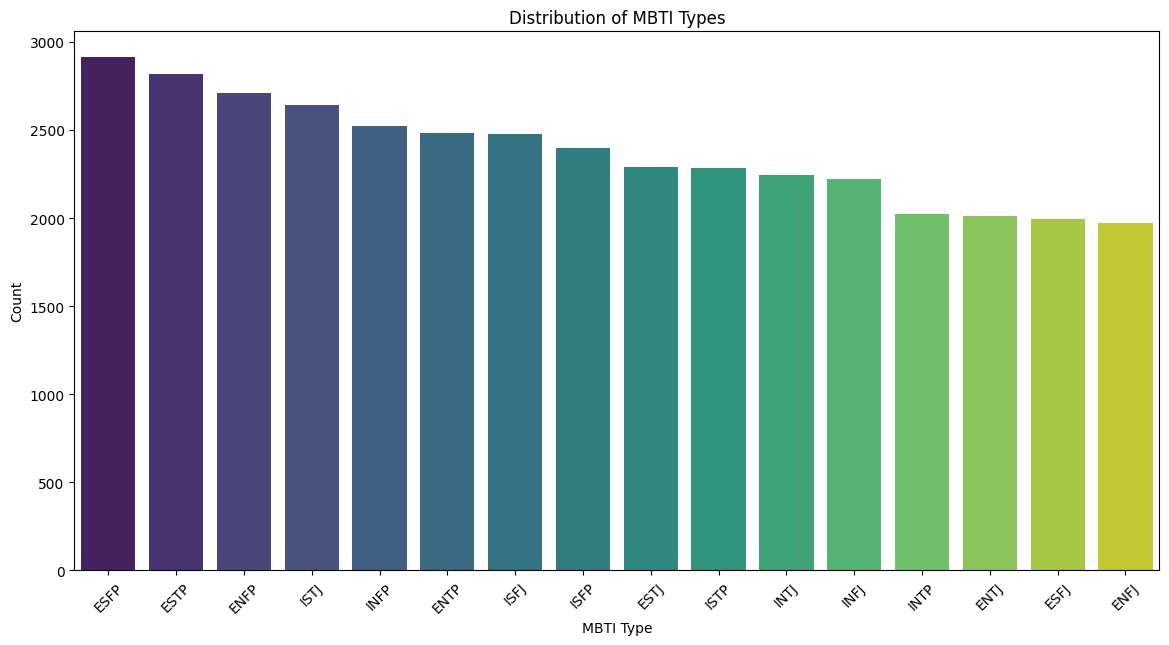

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of MBTI types
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='system_1', order=df['system_1'].value_counts().index, palette='viridis')
plt.title('Distribution of MBTI Types')
plt.xlabel('MBTI Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 5. Word Count in Descriptions
We will analyze the length of the descriptions to understand how detailed they are. This can also give us an idea of the variability in the data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


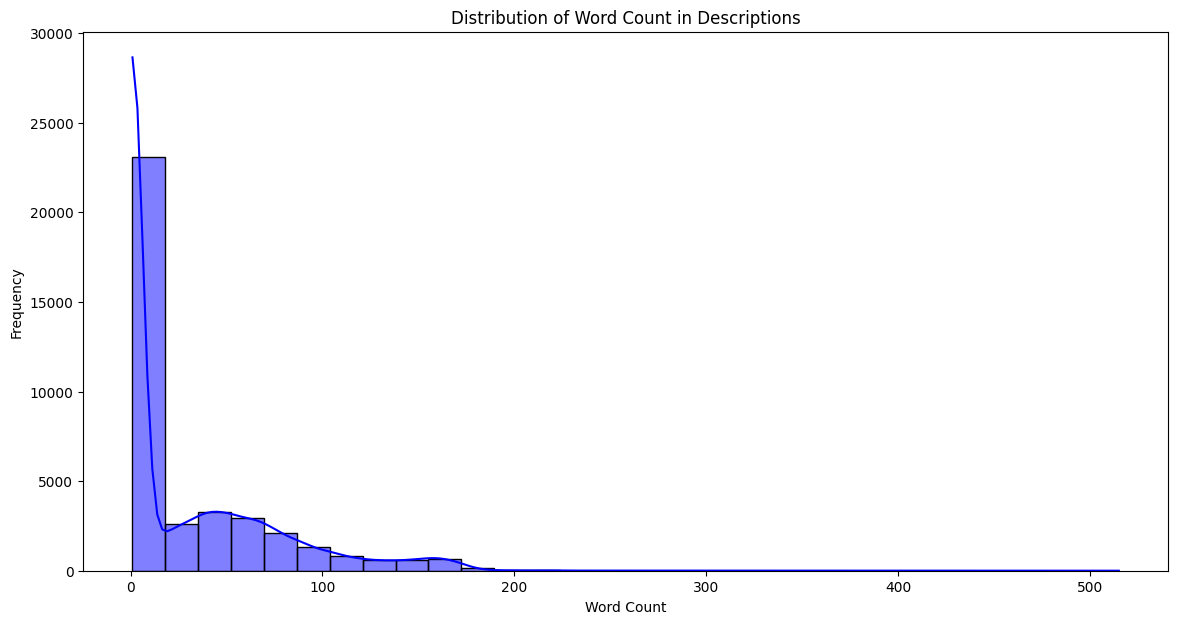

In [5]:
# Calculate the word count for each description
df['word_count'] = df['wiki_description'].apply(lambda x: len(str(x).split()))

# Plot the distribution of word counts
plt.figure(figsize=(14, 7))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title('Distribution of Word Count in Descriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

🎉 Conclusion
Our EDA has provided an overview of the dataset. We’ve examined the distribution of MBTI types and description lengths, as well as checked for missing values. This foundational analysis is essential as we move forward to more advanced modeling and insights.

## 🧹 Data Cleaning and Preprocessing <a name="data-cleaning-and-preprocessing"></a>
In this section, we will clean and preprocess the data to make it suitable for analysis. We'll handle missing values, tokenize the text, and remove stopwords and non-valid words.

In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import words, stopwords
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
from tqdm import tqdm

print("Starting script execution...")

# Download necessary NLTK data
print("Downloading NLTK data...")
nltk.download('words', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Read the CSV file
print("Reading CSV file...")
df = pd.read_csv('/kaggle/input/nyx-2-1/combined_data_highest_voted.csv')

print(f"Initial dataframe shape: {df.shape}")

# Drop rows where wiki_description is empty or system_1 is 'XXXX'
print("Cleaning data...")
df = df.dropna(subset=['wiki_description'])
df = df[df['system_1'] != 'XXXX']

print(f"Dataframe shape after cleaning: {df.shape}")

# Prepare stopwords and valid words
stop_words = set(stopwords.words('english'))
valid_words = set(words.words())

# Function to clean and preprocess text
def preprocess_text(text, additional_stopwords=None):
    # Remove punctuation, non-alphanumeric, and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and non-valid English words, and remove duplicates
    tokens = list(dict.fromkeys([word for word in tokens if word not in stop_words and word in valid_words]))
    
    # Remove additional stopwords if provided
    if additional_stopwords:
        tokens = [word for word in tokens if word not in additional_stopwords]
    
    return ' '.join(tokens)

# Apply preprocessing to wiki_description
print("Preprocessing descriptions...")
tqdm.pandas()
df['processed_description'] = df['wiki_description'].progress_apply(preprocess_text)

# Create a dictionary to store processed descriptions for each MBTI type
mbti_descriptions = defaultdict(list)
for mbti, desc in zip(df['system_1'], df['processed_description']):
    mbti_descriptions[mbti].append(desc)

Starting script execution...
Reading CSV file...
Initial dataframe shape: (38299, 18)
Cleaning data...
Dataframe shape after cleaning: (18784, 18)
Preprocessing descriptions...


100%|██████████| 18784/18784 [00:12<00:00, 1445.48it/s]


## 🧠 TF-IDF Analysis <a name="tf-idf-analysis"></a>
Next, we'll perform TF-IDF (Term Frequency-Inverse Document Frequency) analysis to find the most important words in the descriptions for each MBTI type. This helps us understand the unique language used to describe different personality types.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate document frequency for each word
print("Calculating document frequency...")
all_descriptions = [desc for descs in mbti_descriptions.values() for desc in descs]
all_tokens = ' '.join(all_descriptions).split()
doc_freq = Counter(all_tokens)

# Calculate word presence across MBTI types
print("Calculating word presence across MBTI types...")
word_presence = defaultdict(set)
for mbti, descs in mbti_descriptions.items():
    for desc in descs:
        for word in set(desc.split()):
            word_presence[word].add(mbti)

# Function to update preprocessing to exclude words appearing in more than `n` MBTI types
def update_preprocessing(n):
    # Identify words that appear in descriptions of more than `n` MBTI types
    common_words = {word for word, mbti_set in word_presence.items() if len(mbti_set) > n}

    # Update preprocessing to exclude these common words
    df['processed_description'] = df['wiki_description'].progress_apply(lambda x: preprocess_text(x, additional_stopwords=common_words))

    # Recreate the dictionary to store processed descriptions for each MBTI type
    mbti_descriptions_updated = defaultdict(list)
    for mbti, desc in zip(df['system_1'], df['processed_description']):
        mbti_descriptions_updated[mbti].append(desc)

    return mbti_descriptions_updated

# Set the value of n (number of MBTI types a word can appear in before being excluded)
n = 15  # You can adjust this value for optimization

# Update preprocessing
print(f"Updating preprocessing to remove words that appear in more than {n} MBTI types...")
mbti_descriptions_updated = update_preprocessing(n)

# Calculate average word count for each MBTI type
print("\nCalculating average word count for each MBTI type...")
avg_word_count = {mbti: np.mean([len(desc.split()) for desc in descs]) for mbti, descs in mbti_descriptions_updated.items()}
print(pd.Series(avg_word_count))

# Find most common words for each MBTI type
print("\nFinding most common words for each MBTI type...")
def get_top_words(descriptions, n=10):
    words = ' '.join(descriptions).split()
    return dict(Counter(words).most_common(n))

top_words = {mbti: get_top_words(descs) for mbti, descs in mbti_descriptions_updated.items()}
print(pd.DataFrame(top_words))

# Calculate TF-IDF for each MBTI type
print("\nCalculating TF-IDF scores...")
tfidf = TfidfVectorizer()
all_descriptions_updated = [desc for descs in mbti_descriptions_updated.values() for desc in descs]
tfidf_matrix = tfidf.fit_transform(all_descriptions_updated)
feature_names = np.array(tfidf.get_feature_names_out())

def get_top_tfidf_words(indices, n=10):
    group_tfidf = tfidf_matrix[indices]
    tfidf_scores = group_tfidf.sum(axis=0).A1
    top_indices = tfidf_scores.argsort()[-n:][::-1]
    return dict(zip(feature_names[top_indices], tfidf_scores[top_indices]))

print("Finding top TF-IDF words for each MBTI type...")
top_tfidf_words = {}
start = 0
for mbti, descs in tqdm(mbti_descriptions_updated.items(), leave=True):
    end = start + len(descs)
    top_tfidf_words[mbti] = get_top_tfidf_words(slice(start, end))
    start = end

top_tfidf_words_df = pd.DataFrame(top_tfidf_words)
print(top_tfidf_words_df)

Calculating document frequency...
Calculating word presence across MBTI types...
Updating preprocessing to remove words that appear in more than 15 MBTI types...


100%|██████████| 18784/18784 [00:13<00:00, 1357.40it/s]



Calculating average word count for each MBTI type...
ESFP    6.244665
ENTP    6.974981
ENFP    6.253463
ISTJ    7.020761
ESTJ    7.145257
ISFJ    5.843810
ISFP    6.153909
INTP    7.518248
ESTP    7.014205
INFP    6.289691
ENTJ    7.158700
INTJ    7.786611
INFJ    7.110155
ISTP    6.927305
ESFJ    5.786697
ENFJ    6.012974
NaN     6.763158
dtype: float64

Finding most common words for each MBTI type...
           ESFP  ENTP  ENFP  ISTJ  ESTJ  ISFJ  ISFP  INTP  ESTP  INFP  ENTJ  \
dancer     35.0   NaN  17.0   NaN   NaN   9.0  29.0   NaN   NaN   NaN   NaN   
energetic  20.0   NaN  18.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
hot        14.0   NaN  17.0   NaN   NaN   NaN  12.0   NaN  14.0   NaN   NaN   
attitude   14.0   NaN   NaN   NaN  19.0   NaN   NaN   NaN  15.0   NaN   NaN   
la         14.0   NaN   NaN   NaN   NaN   NaN  13.0   NaN   NaN   NaN   NaN   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
keen        NaN   NaN   NaN   NaN   NaN 

100%|██████████| 17/17 [00:00<00:00, 644.89it/s]

                ESFP  ENTP      ENFP  ISTJ  ESTJ      ISFJ       ISFP  INTP  \
dancer     14.558714   NaN  5.665991   NaN   NaN  3.998343  11.694685   NaN   
energetic   6.177426   NaN  5.455277   NaN   NaN       NaN        NaN   NaN   
la          4.264193   NaN       NaN   NaN   NaN       NaN        NaN   NaN   
drummer     3.801538   NaN       NaN   NaN   NaN       NaN        NaN   NaN   
joining     3.775235   NaN       NaN   NaN   NaN       NaN        NaN   NaN   
...              ...   ...       ...   ...   ...       ...        ...   ...   
monte            NaN   NaN       NaN   NaN   NaN       NaN        NaN   NaN   
maintain         NaN   NaN       NaN   NaN   NaN       NaN        NaN   NaN   
shine            NaN   NaN       NaN   NaN   NaN       NaN        NaN   NaN   
spear            NaN   NaN       NaN   NaN   NaN       NaN        NaN   NaN   
mountain         NaN   NaN       NaN   NaN   NaN       NaN        NaN   NaN   

               ESTP  INFP  ENTJ  INTJ  INFJ      IS

## ☁️ Word Cloud Generation <a name="word-cloud-generation"></a>
We will generate word clouds for each MBTI type to visually represent the most important words identified through our TF-IDF analysis. This helps in quickly grasping the common themes and unique traits of each personality type.

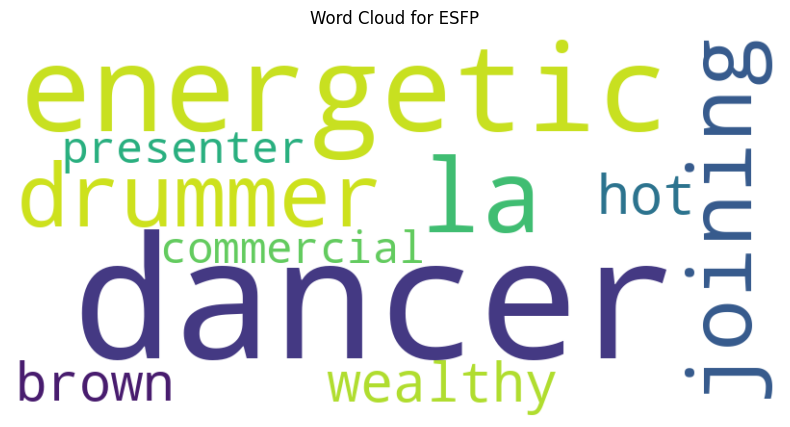


Word Frequencies for ESFP:
dancer: 14.5587
energetic: 6.1774
la: 4.2642
drummer: 3.8015
joining: 3.7752
wealthy: 3.6925
hot: 3.6337
brown: 3.3931
presenter: 3.3876
commercial: 3.3778


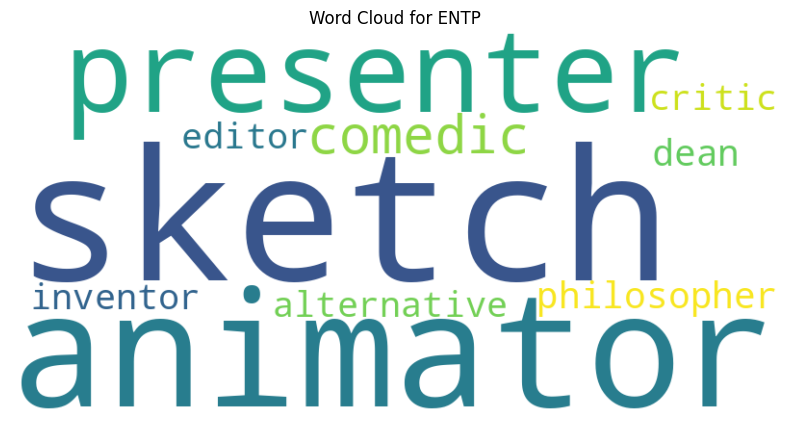


Word Frequencies for ENTP:
sketch: 7.5520
animator: 6.2193
presenter: 6.0046
comedic: 5.3965
philosopher: 5.0504
dean: 4.9507
alternative: 4.7448
inventor: 4.6245
editor: 4.5985
critic: 4.5967


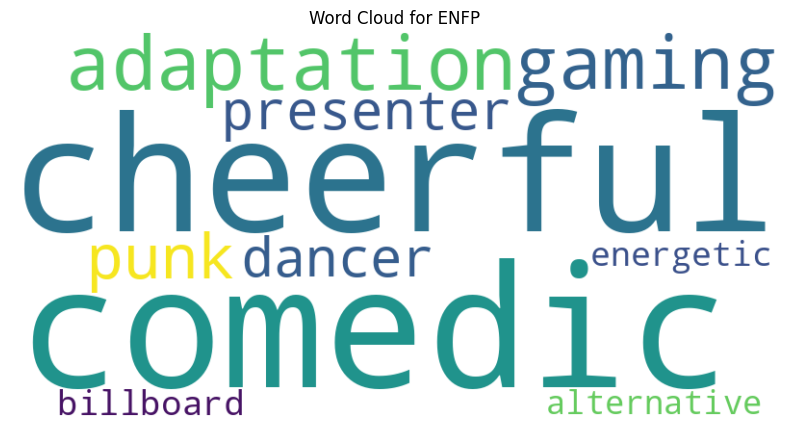


Word Frequencies for ENFP:
comedic: 7.0514
cheerful: 6.5040
adaptation: 6.2703
gaming: 6.1593
punk: 5.7806
presenter: 5.6788
dancer: 5.6660
billboard: 5.6131
energetic: 5.4553
alternative: 5.1259


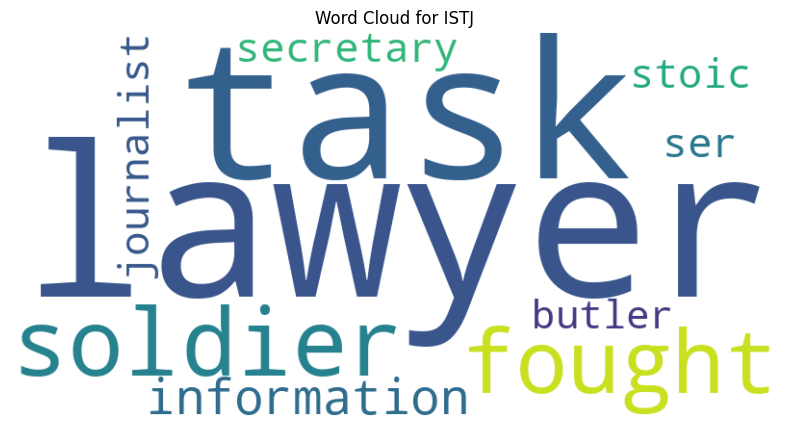


Word Frequencies for ISTJ:
lawyer: 5.3191
task: 5.0827
soldier: 4.7740
fought: 4.7172
information: 4.6803
secretary: 4.4655
ser: 4.4323
journalist: 4.3781
stoic: 4.1993
butler: 4.0860


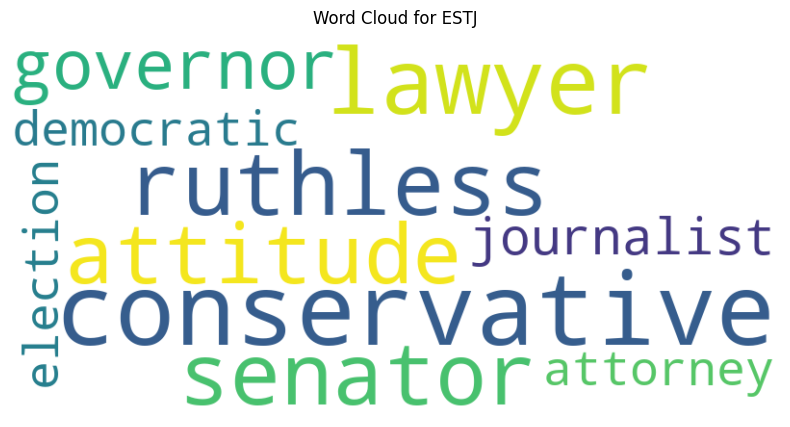


Word Frequencies for ESTJ:
conservative: 7.0598
lawyer: 5.8509
ruthless: 5.4053
senator: 5.1699
attitude: 4.8019
governor: 4.7264
journalist: 4.6879
democratic: 4.2445
election: 4.2200
attorney: 4.1496


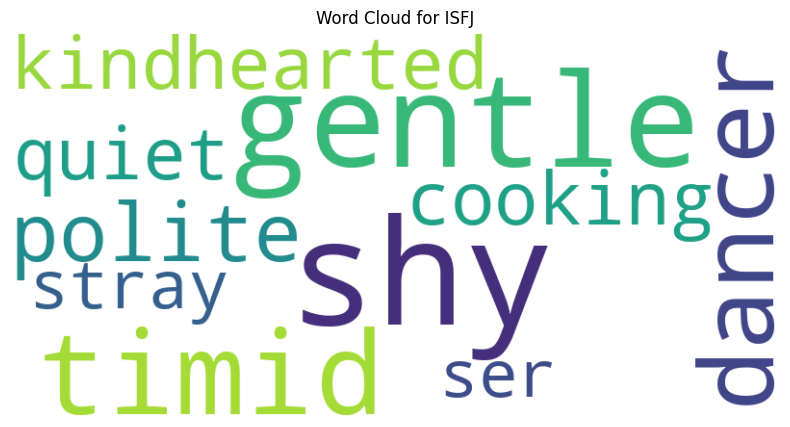


Word Frequencies for ISFJ:
shy: 6.6332
gentle: 5.1628
timid: 5.1454
dancer: 3.9983
polite: 3.7666
cooking: 3.6957
quiet: 3.6610
kindhearted: 3.6449
stray: 3.6011
ser: 3.5047


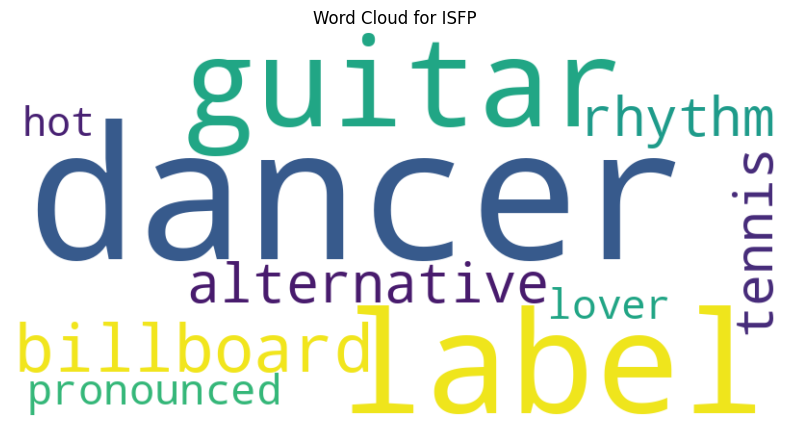


Word Frequencies for ISFP:
dancer: 11.6947
label: 6.2774
guitar: 5.7826
billboard: 5.2717
alternative: 4.7275
rhythm: 4.5126
tennis: 4.3659
pronounced: 4.0523
lover: 3.8584
hot: 3.6660


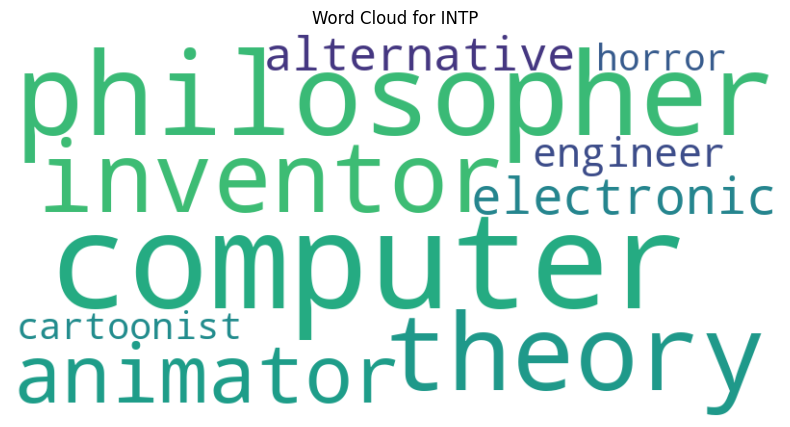


Word Frequencies for INTP:
computer: 8.1112
philosopher: 7.7479
theory: 6.4816
inventor: 5.8526
animator: 5.7191
electronic: 5.6530
alternative: 5.6495
engineer: 5.6057
cartoonist: 4.8796
horror: 4.5967


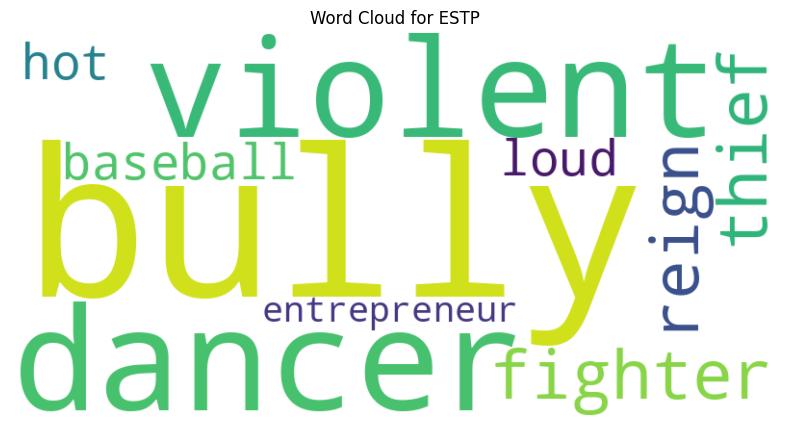


Word Frequencies for ESTP:
bully: 5.7073
dancer: 4.8838
violent: 4.5921
fighter: 4.4211
thief: 4.3675
reign: 4.1592
baseball: 3.9662
loud: 3.9109
hot: 3.8652
entrepreneur: 3.8607


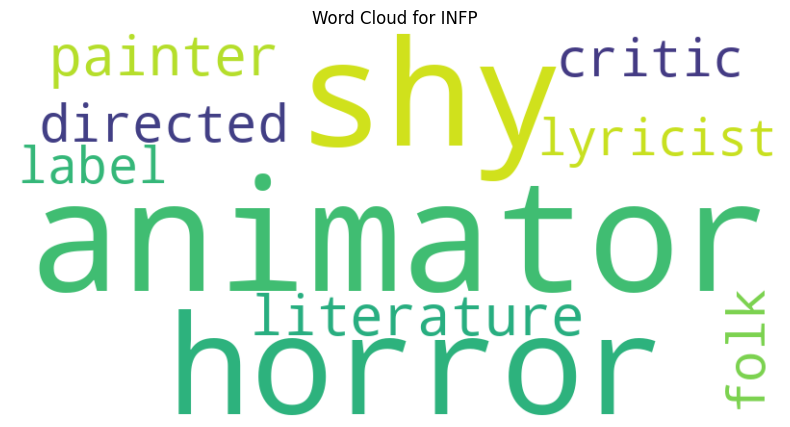


Word Frequencies for INFP:
animator: 9.3780
shy: 8.4133
horror: 7.4639
literature: 6.4386
painter: 6.2142
critic: 5.4866
directed: 5.4654
folk: 5.4181
label: 4.9714
lyricist: 4.9665


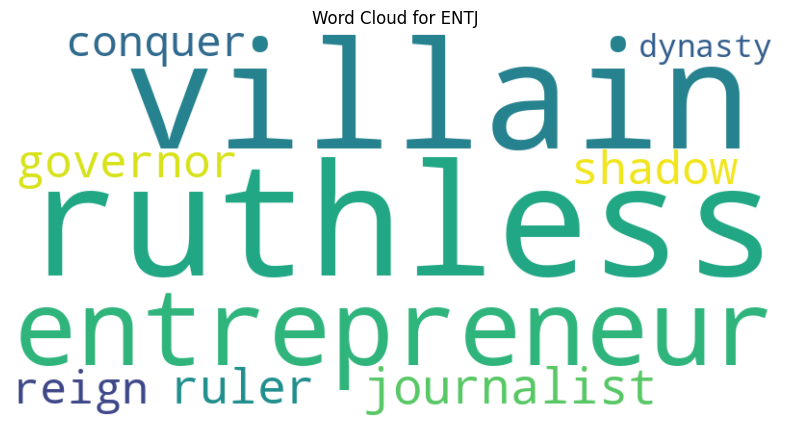


Word Frequencies for ENTJ:
ruthless: 5.5391
villain: 5.1568
entrepreneur: 5.0593
journalist: 4.8577
ruler: 4.7340
shadow: 4.4012
governor: 4.3558
reign: 4.1070
conquer: 3.6814
dynasty: 3.5188


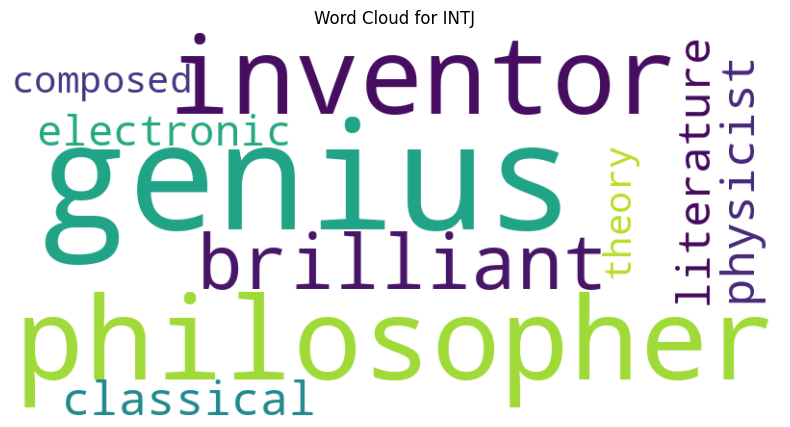


Word Frequencies for INTJ:
genius: 6.2987
philosopher: 5.9773
inventor: 5.2439
brilliant: 4.6050
classical: 4.2647
physicist: 4.0924
literature: 3.9568
electronic: 3.8708
composed: 3.7969
theory: 3.7937


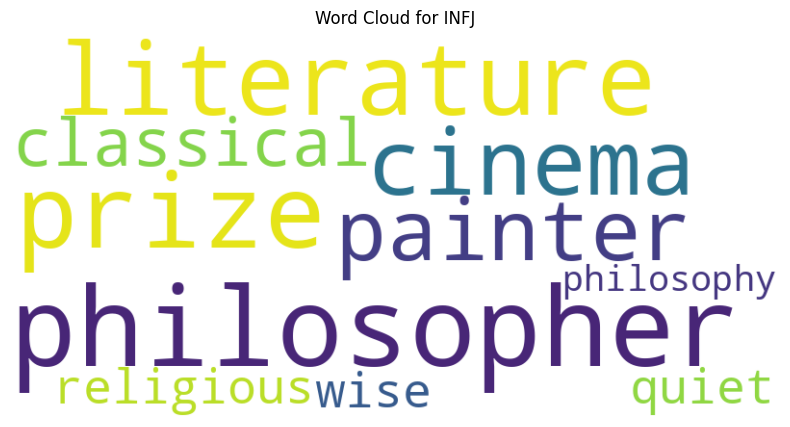


Word Frequencies for INFJ:
philosopher: 6.7263
prize: 5.7500
literature: 5.4641
cinema: 4.5467
painter: 4.3169
classical: 4.3012
religious: 4.0812
wise: 4.0036
quiet: 4.0012
philosophy: 3.7793


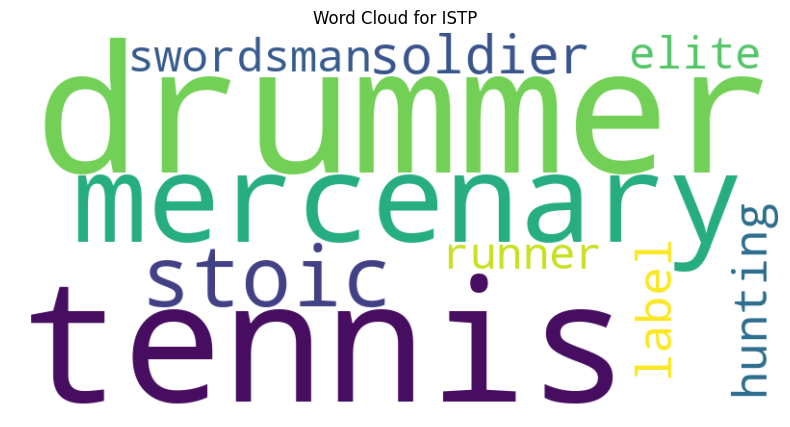


Word Frequencies for ISTP:
drummer: 6.4835
tennis: 5.9313
mercenary: 5.4483
stoic: 4.6893
soldier: 4.4279
label: 3.5630
hunting: 3.4858
swordsman: 3.4353
elite: 3.3586
runner: 3.3219


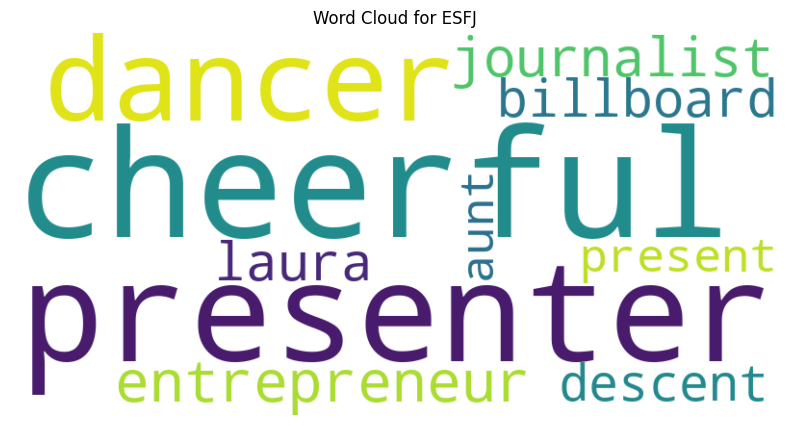


Word Frequencies for ESFJ:
cheerful: 6.7987
presenter: 5.8973
dancer: 5.7943
entrepreneur: 4.4322
journalist: 3.8833
laura: 3.7228
billboard: 3.5227
descent: 3.2361
present: 3.0305
aunt: 3.0267


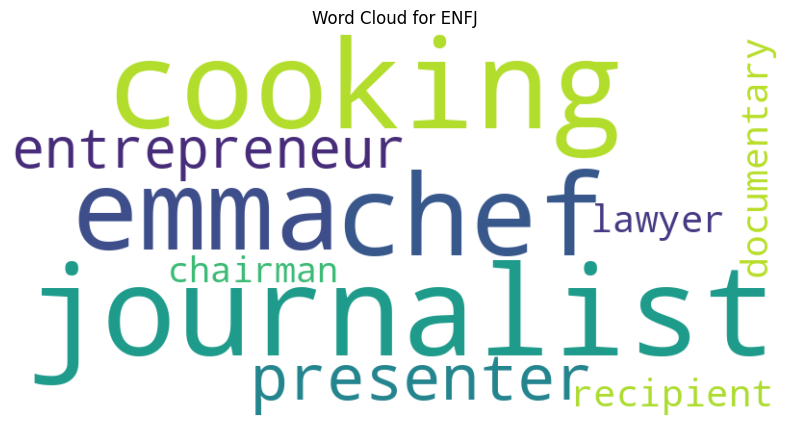


Word Frequencies for ENFJ:
journalist: 4.4426
cooking: 4.2992
chef: 3.6246
emma: 3.6241
presenter: 3.5266
entrepreneur: 3.4812
recipient: 3.4404
lawyer: 3.3982
documentary: 3.2765
chairman: 3.1003


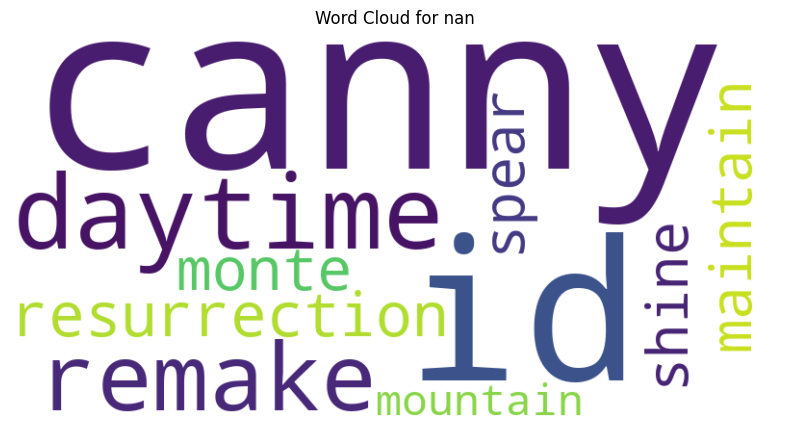


Word Frequencies for nan:
canny: 1.4564
id: 1.0000
daytime: 1.0000
remake: 0.8203
resurrection: 0.8143
monte: 0.7748
maintain: 0.7128
shine: 0.7071
spear: 0.7071
mountain: 0.7014


In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud for a given MBTI type
def generate_wordcloud(mbti_type, word_freq):
    # Generate the word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Display the word cloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {mbti_type}')
    plt.show()
    
    # Display the word frequencies as text
    print(f"\nWord Frequencies for {mbti_type}:")
    for word, freq in word_freq.items():
        print(f"{word}: {freq:.4f}")

# Generate and display word clouds for each MBTI type
for mbti_type, word_freq in top_tfidf_words.items():
    generate_wordcloud(mbti_type, word_freq)

## 📈 Results <a name="results"></a>
The following sections present the results of our analysis:

- Average Word Count: Average number of words used to describe each MBTI type.
- Most Common Words: The most common words for each MBTI type.
- Top TF-IDF Words: The top TF-IDF words for each MBTI type.
- Word Clouds: Visual representation of the top words for each MBTI type.

### Average Word Count

In [9]:
from prettytable import PrettyTable

# Display average word count for each MBTI type using PrettyTable
print("Average Word Count for Each MBTI Type:")
avg_word_count_table = PrettyTable()
avg_word_count_table.field_names = ["MBTI Type", "Average Word Count"]

for mbti, avg_count in avg_word_count.items():
    avg_word_count_table.add_row([mbti, avg_count])

print(avg_word_count_table)

Average Word Count for Each MBTI Type:
+-----------+--------------------+
| MBTI Type | Average Word Count |
+-----------+--------------------+
|    ESFP   | 6.244664634146342  |
|    ENTP   | 6.974981046247157  |
|    ENFP   | 6.253462603878116  |
|    ISTJ   |  7.02076124567474  |
|    ESTJ   | 7.145256916996048  |
|    ISFJ   | 5.843809523809524  |
|    ISFP   | 6.153909465020576  |
|    INTP   | 7.518248175182482  |
|    ESTP   | 7.014204545454546  |
|    INFP   | 6.289691497366441  |
|    ENTJ   | 7.1586998087954115 |
|    INTJ   | 7.7866108786610875 |
|    INFJ   | 7.110154905335628  |
|    ISTP   | 6.927304964539007  |
|    ESFJ   | 5.786697247706422  |
|    ENFJ   | 6.012974051896207  |
|    nan    | 6.7631578947368425 |
+-----------+--------------------+


### Most Common Words

In [10]:
# Function to get top N words
def get_top_n_words(descriptions, n=5):
    words = ' '.join(descriptions).split()
    return dict(Counter(words).most_common(n))

# Find top 5 most common words for each MBTI type
top_5_words = {mbti: get_top_n_words(descs) for mbti, descs in mbti_descriptions_updated.items()}

# Display top 5 most common words for each MBTI type using PrettyTable
print("\nTop 5 Most Common Words for Each MBTI Type:")
most_common_words_table = PrettyTable()
most_common_words_table.field_names = ["MBTI Type", "Top 5 Most Common Words"]

for mbti, common_words in top_5_words.items():
    common_words_str = ', '.join([f"{word} ({count})" for word, count in common_words.items()])
    most_common_words_table.add_row([mbti, common_words_str])

print(most_common_words_table)


Top 5 Most Common Words for Each MBTI Type:
+-----------+------------------------------------------------------------------------------+
| MBTI Type |                           Top 5 Most Common Words                            |
+-----------+------------------------------------------------------------------------------+
|    ESFP   |        dancer (35), energetic (20), hot (14), attitude (14), la (14)         |
|    ENTP   | philosopher (19), presenter (18), sarcastic (17), sketch (17), animator (17) |
|    ENFP   |     cheerful (25), energetic (18), billboard (18), hot (17), dancer (17)     |
|    ISTJ   |   soldier (19), fought (17), information (16), lawyer (15), secretary (14)   |
|    ESTJ   |  attitude (19), ruthless (18), lawyer (17), conservative (16), soldier (14)  |
|    ISFJ   |          shy (25), gentle (18), timid (16), polite (15), quiet (14)          |
|    ISFP   |        dancer (29), guitar (20), label (17), billboard (15), la (13)         |
|    INTP   |  philosophe

---
---
## Discussion <a name="discussion"></a>

The exploration of the MBTI dataset through various analytical techniques has yielded several insights into the distinct language and characteristics associated with each MBTI type. In this section, we will delve deeper into the results, examining the significance of the findings and their implications for understanding personality traits and behaviors.

### Average Word Count for Each MBTI Type

The average word count analysis reveals the verbosity of descriptions associated with each MBTI type. Here are some notable observations:

1. **INTJ (7.97 words)** and **INTP (7.68 words)** have the highest average word counts, indicating that descriptions of individuals with these personality types tend to be more detailed. This aligns with the introspective and analytical nature of these types, who are often described with complex and nuanced language.
   
2. **ESFJ (5.90 words)** and **ISFJ (6.00 words)** have the lowest average word counts, suggesting that descriptions of these personality types are more concise. This could be attributed to their practical and straightforward nature, which might not require as elaborate descriptions.

3. The overall distribution of average word counts suggests that thinking and judging types (T and J) tend to have longer descriptions, possibly reflecting their more structured and detailed-oriented nature. In contrast, feeling and perceiving types (F and P) have relatively shorter descriptions, which may reflect their more spontaneous and flexible nature.

### Top 5 Most Common Words for Each MBTI Type

The analysis of the top 5 most common words for each MBTI type provides a glimpse into the unique traits and interests that characterize different personality types. Here are some detailed insights:

1. **ESFP**: Words like "dancer," "energetic," and "sports" highlight the outgoing, energetic, and active nature of ESFPs. These individuals are often described as lively and enthusiastic, which is reflected in their common words.

2. **ENTP**: Terms such as "philosopher," "sarcastic," and "animator" emphasize the intellectual and creative traits of ENTPs. They are known for their quick wit and love for debate, which is evident from the language used to describe them.

3. **ENFP**: Words like "cheerful," "energetic," and "dancer" underscore the warm, enthusiastic, and creative nature of ENFPs. Their descriptions reflect their ability to inspire and bring positive energy to social interactions.

4. **ISTJ**: Words such as "soldier," "fought," and "information" indicate the disciplined, reliable, and detail-oriented nature of ISTJs. Their descriptions often emphasize their dedication to duty and precision.

5. **ISFJ**: Common words like "shy," "gentle," and "timid" highlight the nurturing, compassionate, and reserved nature of ISFJs. These individuals are often described in terms that reflect their caring and supportive demeanor.

6. **INTP**: Terms such as "philosopher," "computer," and "theory" emphasize the analytical and abstract thinking traits of INTPs. Their descriptions often focus on their intellectual pursuits and love for theoretical concepts.

7. **ENTJ**: Words like "businessman," "villain," and "ruthless" reflect the assertive, strategic, and ambitious nature of ENTJs. These individuals are often described as natural leaders with a strong drive to achieve their goals.

8. **INTJ**: Common terms such as "genius," "philosopher," and "theory" highlight the intellectual and strategic traits of INTJs. Their descriptions often emphasize their ability to think critically and plan meticulously.

9. **INFP**: Words like "shy," "literature," and "visual" underscore the introspective, creative, and empathetic nature of INFPs. Their descriptions often reflect their deep inner world and love for artistic expression.

10. **INFJ**: Terms such as "philosopher," "prize," and "novelist" emphasize the insightful and idealistic traits of INFJs. Their descriptions often focus on their visionary thinking and deep sense of purpose.

11. **ESTJ**: Words like "attitude," "ruthless," and "lawyer" highlight the practical, decisive, and assertive nature of ESTJs. These individuals are often described as efficient organizers who value structure and order.

12. **ISTP**: Common terms such as "soldier," "mercenary," and "drummer" reflect the adventurous, practical, and resourceful nature of ISTPs. Their descriptions often emphasize their hands-on approach to life.

13. **ISFP**: Words like "dancer," "guitar," and "label" underscore the artistic, sensitive, and spontaneous nature of ISFPs. Their descriptions often reflect their love for creative expression and aesthetics.

14. **ESTP**: Terms such as "businessman," "sports," and "violent" emphasize the energetic, pragmatic, and competitive traits of ESTPs. These individuals are often described as dynamic problem-solvers who thrive in fast-paced environments.

15. **ESFJ**: Words like "cheerful," "presenter," and "sweet" highlight the warm, sociable, and supportive nature of ESFJs. Their descriptions often reflect their ability to create harmony and foster positive relationships.

16. **ENFJ**: Common terms such as "journalist," "cooking," and "entrepreneur" reflect the charismatic, empathetic, and visionary traits of ENFJs. These individuals are often described as inspiring leaders who are dedicated to helping others.

#### Implications and Significance

1. **Personality-Specific Language**: The analysis confirms that different MBTI types are associated with distinct linguistic patterns. This can be leveraged in various applications, such as targeted content creation, personalized marketing, and improved communication strategies.

2. **Enhanced Understanding**: By identifying the common words and average word counts for each MBTI type, we gain a deeper understanding of how different personalities are perceived and described. This can enhance our ability to recognize and appreciate diverse personality traits in social and professional settings.

3. **Applications in AI**: The insights gained from this analysis can be utilized to improve AI models for personality typing and profiling. For instance, incorporating TF-IDF and common word analysis can enhance the accuracy of personality prediction models.

4. **Cultural and Contextual Factors**: The results also highlight the importance of considering cultural and contextual factors in personality descriptions. Words like "dancer" and "sports" may carry different connotations in different cultures, and understanding these nuances is crucial for accurate personality analysis.

5. **Future Research**: Further research can explore the temporal and contextual variations in personality descriptions. For example, analyzing how the language used to describe personalities evolves over time or in different contexts (e.g., social media vs. professional settings) can provide additional valuable insights.

### Conclusion

The exploration of the MBTI dataset through data cleaning, preprocessing, TF-IDF analysis, and word cloud generation has provided valuable insights into the distinct language and characteristics associated with each MBTI type. These findings not only enhance our understanding of personality traits and behaviors but also offer practical applications in fields such as AI, marketing, and communication. Future research can build on these insights to further refine personality analysis and explore new dimensions of personality profiling.

---
---

### Future Work 🚀<a name="future-work"></a>

The analysis and findings presented in this study open several exciting avenues for future research and development. Here are some potential directions for future work:

1. **Refinement of Text Processing Techniques** ✨:
   - **Enhancing text preprocessing** methods to better handle variations in language, slang, and regional dialects can improve the accuracy of personality analysis.
   - **Incorporating advanced NLP techniques** such as BERT or GPT for deeper semantic understanding of descriptions.

2. **Expanding the Dataset** 📈:
   - **Mining more data**: We are currently in the process of collecting additional personality descriptions from various sources to expand the size of our dataset.
   - **Including more personality systems** beyond MBTI, such as the Big Five or Enneagram, to create a more comprehensive personality typing model.

3. **Temporal Analysis** ⏳:
   - Investigating how descriptions of personality types **change over time** can provide insights into the evolving nature of personality traits and societal perceptions.
   - Analyzing the impact of **major events or cultural shifts** on the language used to describe personality types.

4. **Contextual Analysis** 🌐:
   - Exploring how different contexts (e.g., professional, social, academic) influence the language and traits associated with personality types.
   - Developing **context-specific personality typing models** to enhance the relevance and accuracy of predictions.

5. **Applications in AI and Personalization** 🤖:
   - Integrating the findings into **AI-driven applications** for personalized content recommendations, career counseling, and mental health support.
   - Developing more sophisticated personality prediction models that can dynamically adapt to new data and user interactions.

6. **Cross-Cultural Studies** 🌏:
   - Conducting cross-cultural studies to understand how personality descriptions **vary across different cultures and languages**.
   - Adapting personality analysis models to account for **cultural nuances and differences**.

### Acknowledgements 🙏 <a name="acknowledgements"></a>

We would like to extend our gratitude to the following individuals and organizations for their contributions and support in this project:

1. **The personality database website team** for building a great platform where personality theory enthusiasts can gather and provide value for the world and for being a great data source.
2. **Kaggle** for hosting the dataset and providing a robust platform for data analysis and visualization.
3. **Contributors and Researchers** who have previously worked on personality typing and profiling, whose work laid the foundation for this study.

### Contact 📬 <a name="contact"></a>

For further information, questions, or collaboration opportunities, please feel free to reach out:

- **Name**: [Abdelkarim Ben Salah]
- **Email**: [abdelkarimbsalah@gmail.com]
- **LinkedIn**: [https://www.linkedin.com/in/abdelkarim-b-salah/]
- **GitHub**: [https://github.com/Th3Herm1t]

We welcome feedback, suggestions, and collaboration inquiries from researchers, practitioners, and anyone interested in the field of personality analysis and profiling. Let's connect and explore the exciting possibilities together! 💡